# Week 12 Homework (Unit 11 - Pandas)

**Assignment due date:** Midnight the night before the Week 13 Live Session. 

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located inside the dataset "CA.zip", available online at the fec.gov website, here: http://www.fec.gov/disclosurep/PDownload.do. You will need to download then "unzip" the file and save the csv in the same folder as this notebook.

Documentation for this data file can be found here: ftp://ftp.fec.gov/FEC/Presidential_Map/2016/DATA_DICTIONARIES/CONTRIBUTOR_FORMAT.txt

Note - While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond.

First, let's load in the data. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

We will also subset the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [1]:
!pwd

/Users/GunnarK/Dropbox/coderepos/BerkeleyMIDS/W18_python_Current/assignment-upstream-summer17/week_13


In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('~/Downloads/P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)
# Note - for now, it is okay to ignore the warning about mixed types.  

/Users/GunnarK/miniconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(contrib.shape)
# Subset data to primary period
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1304346, 18)
(654503, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [4]:
print(contrib.shape)
print(contrib.columns)

(654503, 18)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


We see above that our dataset has 653,397 rows and 18 variables. All of the columns listed in the documentation are in our file.

The election_tp variable tells if the contribution was made for a primary (P), general (G), or other (various codes) election.

**1b.** Print out the first 5 observations from the dataset to manually look through some of your data.

In [5]:
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
6,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick three variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scruitney or if you have concerns about the integrity of your data. 

[Results will differ by student. Below is some exploration I did, without limited. Students are expected to discuss their data checks in more detail.]

Below we see that there are many more donations to the two democratic candidates than the republicans. This fits our mental image of CA voters.

In [6]:
contrib.cand_nm.value_counts()

Sanders, Bernard             371795
Clinton, Hillary Rodham      163510
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_nm, dtype: int64

Our data ranges from 2013 to 2016

In [7]:
print(contrib.contb_receipt_dt.min(), contrib.contb_receipt_dt.max())

2013-11-05 00:00:00 2016-05-31 00:00:00


Interestingly, most campaign contributions appear to happen on the last day of the month. I wonder if there is a reason for this...

In [8]:
contrib.contb_receipt_dt.value_counts().head()

2016-02-29    11735
2016-03-31    11506
2016-05-31    10435
2016-04-30     9479
2016-03-09     8887
Name: contb_receipt_dt, dtype: int64

## 2. Exploring Campaign Contributions

Let's investigate the donations to our candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 12.5.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate received the largest number of contributions (variable 'contb_receipt_amt')?

The table below shows that Bernie Sanders recieved the largest number of contributions.

In [9]:
don_ct = contrib.groupby('cand_nm').contb_receipt_amt.count().sort_values(ascending=False)
print(don_ct)

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163510
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64


**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

Below, we find that Hillary Clinton raised the most money, followed by Bernie Sanders.

In [10]:
don_val = contrib.groupby('cand_nm').contb_receipt_amt.sum().sort_values(ascending=False)
print(don_val)

cand_nm
Clinton, Hillary Rodham     39,368,688.56
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        298,334.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.


In [11]:
print(type(don_ct))
print(type(don_val))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
df_ct = pd.DataFrame(don_ct)
df_ct.columns = ['Donation_Count']
df_val = pd.DataFrame(don_val)
df_val.columns = ['Donation_Value']

In [13]:
df_ct.head()

,Donation_Count
cand_nm,
"Sanders, Bernard",371795
"Clinton, Hillary Rodham",163510
"Cruz, Rafael Edward 'Ted'",57136
"Carson, Benjamin S.",27342
"Rubio, Marco",14089


In [14]:
donations_by_candidate = df_ct.join(df_val)
print(donations_by_candidate)

                           Donation_Count  Donation_Value
cand_nm                                                  
Sanders, Bernard                   371795   18,773,871.31
Clinton, Hillary Rodham            163510   39,368,688.56
Cruz, Rafael Edward 'Ted'           57136    6,286,460.34
Carson, Benjamin S.                 27342    2,952,109.00
Rubio, Marco                        14089    4,846,483.72
Fiorina, Carly                       4696    1,468,489.42
Paul, Rand                           4256      797,624.29
Bush, Jeb                            3114    3,325,536.83
Kasich, John R.                      2988    1,553,823.54
Trump, Donald J.                     2255      893,356.89
Walker, Scott                         713      495,006.90
Huckabee, Mike                        531      230,890.60
O'Malley, Martin Joseph               397      298,334.26
Lessig, Lawrence                      372      186,144.50
Graham, Lindsey O.                    342      408,595.00
Christie, Chri

**2d.** Calculate and add a new variable to your table that shows the average $ per donation.

In [15]:
donations_by_candidate['Avg_Donation'] = donations_by_candidate.Donation_Value / donations_by_candidate.Donation_Count 

In [16]:
print(donations_by_candidate)

                           Donation_Count  Donation_Value  Avg_Donation
cand_nm                                                                
Sanders, Bernard                   371795   18,773,871.31         50.50
Clinton, Hillary Rodham            163510   39,368,688.56        240.77
Cruz, Rafael Edward 'Ted'           57136    6,286,460.34        110.03
Carson, Benjamin S.                 27342    2,952,109.00        107.97
Rubio, Marco                        14089    4,846,483.72        343.99
Fiorina, Carly                       4696    1,468,489.42        312.71
Paul, Rand                           4256      797,624.29        187.41
Bush, Jeb                            3114    3,325,536.83      1,067.93
Kasich, John R.                      2988    1,553,823.54        520.02
Trump, Donald J.                     2255      893,356.89        396.17
Walker, Scott                         713      495,006.90        694.26
Huckabee, Mike                        531      230,890.60       

**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

[Potential Answer] While Hillary Clinton has raised the most money, Bernie has had the largest individual number of supporters. The size of their donations are drastically different. While Hillary averages \$241, Bernie averages \$50. Many people have said that Bernie ran a "grassroots" campaign that saught to get buy-in from many different people. The evidence we have found would support such a story. 

At a high level, we also see that republican candidates raise a lot less money than democrats in CA.

## 3. Exploring Doner Occupation

We saw in part 2 that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then, use "value_counts()" and "head()" to display the top 5 occupations (contbr_occupation) for her doners. Note: we are just interested in the count of donations, not the value of those donations.

In [17]:
don = contrib[contrib.cand_nm == 'Clinton, Hillary Rodham']
don.contbr_occupation.value_counts().head(5)

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

**3b.** Time to unlock the power of Python! Even though we are doing data analysis, we can still create functions. Copy/paste your code above, but turn it into a function that that can be run for any candidate (not just Hillary Clinton).

In [18]:
def get_doners(candidate):
    don = contrib[contrib.cand_nm == candidate]
    print(don.contbr_occupation.value_counts().head(5))

**3c.** Run your function on three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [19]:
print("Top 5 occupations for Hillary:")
get_doners('Clinton, Hillary Rodham')
print("\nTop 5 occupations for Bernie:")
get_doners('Sanders, Bernard')
print("\nTop 5 occupations for Trump:")
get_doners('Trump, Donald J.')

Top 5 occupations for Hillary:
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

Top 5 occupations for Bernie:
NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64

Top 5 occupations for Trump:
RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64


**3d.** Comment on your findings in a short paragraph.

[Potential Answer] While Hillary seems popular with Retirees, Bernie is popular with the Unemployed. In this dataset, Unemployed may include students. This fits a larger popular narriative that Bernie is popular amoung young, college students, and Hillary is popular among older democrats.

While we do not have much data for Trump in California (he doesn't have many doners), it is interesting to see "CEO" "OWNER" and "PRESIDENT" as common titles. It looks like Trump may have the support of some fellow business leaders.

**3e.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

[Potential Answer]. In Section 2, we saw that Bernie had more contributions but a lower value per contribution. This makes sense, given that we now see many of his supporters are unemployed (or students). 

## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

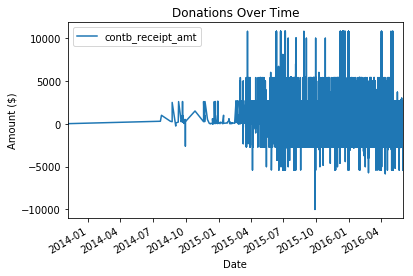

In [20]:
contrib.plot(x='contb_receipt_dt', y='contb_receipt_amt')
plt.title("Donations Over Time")
plt.xlabel("Date")
plt.ylabel("Amount ($)")

**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

[Potential Answer] Donations do not start in earnest until second quarter 2015. We also see that refunds (negative values) occur more than just sporadically.

We hope you enjoyed this assignment! If you have any comments for us, please leave them in your notebook below.

## Extended Lecture - Async Review

You saw a lot in the advanced Pandas asnyc this week. This section is not well commented - for details, please review the class video.

Let's hone in on a few functions that may be helpful in your project:
1. cut()
2. agg()
3. apply()

In [21]:
df = contrib[['cand_nm','contb_receipt_amt']].copy()
df.head()

,cand_nm,contb_receipt_amt
0,"Clinton, Hillary Rodham",50.00
1,"Clinton, Hillary Rodham",200.00
2,"Clinton, Hillary Rodham",5.00
4,"Sanders, Bernard",40.00
6,"Sanders, Bernard",35.00


### "cut" 

Cut() is used to create categorical variables that you can use in analysis (plotting, groupby, etc.)

In [22]:
ranges = [0,25,50,100,500,1000]
labels = ['Tiny','Small','Medium','Large','Huge']

In [23]:
pd.cut(df.contb_receipt_amt, ranges, labels=labels).head()

0    Small
1    Large
2     Tiny
4    Small
6    Small
Name: contb_receipt_amt, dtype: category
Categories (5, object): [Tiny < Small < Medium < Large < Huge]

In [24]:
df['donation_size'] = pd.cut(df.contb_receipt_amt, ranges, labels=labels).astype('category')

In [25]:
df.head()

,cand_nm,contb_receipt_amt,donation_size
0,"Clinton, Hillary Rodham",50.00,Small
1,"Clinton, Hillary Rodham",200.00,Large
2,"Clinton, Hillary Rodham",5.00,Tiny
4,"Sanders, Bernard",40.00,Small
6,"Sanders, Bernard",35.00,Small


### "agg"

Agg lets you preform multiple summary stats at once.

In [27]:
df.groupby(['cand_nm']).sum().sort_values('contb_receipt_amt', ascending=False).head()

,contb_receipt_amt
cand_nm,
"Clinton, Hillary Rodham","39,368,688.56"
"Sanders, Bernard","18,773,871.31"
"Cruz, Rafael Edward 'Ted'","6,286,460.34"
"Rubio, Marco","4,846,483.72"
"Bush, Jeb","3,325,536.83"


In [28]:
import numpy as np
df.groupby(['cand_nm']).contb_receipt_amt.agg({'TotalDonations':np.sum}).sort_values('TotalDonations', ascending=False).head()

/Users/GunnarK/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,TotalDonations
cand_nm,
"Clinton, Hillary Rodham","39,368,688.56"
"Sanders, Bernard","18,773,871.31"
"Cruz, Rafael Edward 'Ted'","6,286,460.34"
"Rubio, Marco","4,846,483.72"
"Bush, Jeb","3,325,536.83"


In [30]:
df.groupby(['cand_nm']).contb_receipt_amt.agg({'TotalDonations':[np.sum, np.mean]}) \
    .sort_values([('TotalDonations','sum')], ascending=False).head()

/Users/GunnarK/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


TotalDonations         
                                     sum     mean
cand_nm                                          
Clinton, Hillary Rodham    39,368,688.56   240.77
Sanders, Bernard           18,773,871.31    50.50
Cruz, Rafael Edward 'Ted'   6,286,460.34   110.03
Rubio, Marco                4,846,483.72   343.99
Bush, Jeb                   3,325,536.83 1,067.93

### "apply"

apply() lets you apply any function to each row in your data (see below). You can combine it with groupby() to apply a function to a panel of data - e.g., a function that takes all observations for Hillary as an input (see async).

In [31]:
def times_two(data):
    return data * 2

In [32]:
print(df.contb_receipt_amt.head())

print("Times Two:")

print(df.contb_receipt_amt.apply(times_two).head())

0    50.00
1   200.00
2     5.00
4    40.00
6    35.00
Name: contb_receipt_amt, dtype: float64
Times Two:
0   100.00
1   400.00
2    10.00
4    80.00
6    70.00
Name: contb_receipt_amt, dtype: float64


In [33]:
df['times_two'] = df.contb_receipt_amt.apply(lambda x: x*2)

In [34]:
print(df.head())

                   cand_nm  contb_receipt_amt donation_size  times_two
0  Clinton, Hillary Rodham              50.00         Small     100.00
1  Clinton, Hillary Rodham             200.00         Large     400.00
2  Clinton, Hillary Rodham               5.00          Tiny      10.00
4         Sanders, Bernard              40.00         Small      80.00
6         Sanders, Bernard              35.00         Small      70.00


### agg continued

In [35]:
df.groupby(['cand_nm']).contb_receipt_amt.agg({'TotalDonations':[np.sum, np.mean]}).head()

/Users/GunnarK/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


TotalDonations         
                                     sum     mean
cand_nm                                          
Bush, Jeb                   3,325,536.83 1,067.93
Carson, Benjamin S.         2,952,109.00   107.97
Christie, Christopher J.      456,066.00 1,369.57
Clinton, Hillary Rodham    39,368,688.56   240.77
Cruz, Rafael Edward 'Ted'   6,286,460.34   110.03

In [36]:
df.groupby(['cand_nm'])['contb_receipt_amt'].agg({'TotalDonations':[np.sum, np.mean]}).head()

/Users/GunnarK/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


TotalDonations         
                                     sum     mean
cand_nm                                          
Bush, Jeb                   3,325,536.83 1,067.93
Carson, Benjamin S.         2,952,109.00   107.97
Christie, Christopher J.      456,066.00 1,369.57
Clinton, Hillary Rodham    39,368,688.56   240.77
Cruz, Rafael Edward 'Ted'   6,286,460.34   110.03

In [37]:
df.groupby(['cand_nm'])['contb_receipt_amt','times_two'].agg({'TotalDonations':[np.sum, np.mean]}).head()

TotalDonations                                
                          contb_receipt_amt              times_two         
                                        sum     mean           sum     mean
cand_nm                                                                    
Bush, Jeb                      3,325,536.83 1,067.93  6,651,073.66 2,135.86
Carson, Benjamin S.            2,952,109.00   107.97  5,904,218.00   215.94
Christie, Christopher J.         456,066.00 1,369.57    912,132.00 2,739.14
Clinton, Hillary Rodham       39,368,688.56   240.77 78,737,377.12   481.54
Cruz, Rafael Edward 'Ted'      6,286,460.34   110.03 12,572,920.68   220.05

## Psudocoding

When psudocoding for data analysis, think about the different *dataset transformations* you will need to make.

In [ ]:
# Goal: Plot monthly total contributions with one line per candidate.
# contrib.head()
# We have one row per contribution, a bunch of variables.
# Step 1: One row per candidate and month, with the sum of contb_receipt_amt
# Step 2: Transform data to have one row per month, and columns with monthly contributions per candidate.


## Data Visualization

To better visualize data, it helps to cut down on the number of data points. To do this, let's create monthly sums for each candidate. Let's also 'pivot' our data, so we have one variable for each candidate. Our final dataset will have one data point per month and look like...

<table>
<tr>
    <td> <b>Date</b> </td>
    <td> <b>Hillary</b> </td>
    <td> <b>Bernie</b> </td>
</tr>
<tr>
    <td> 2015-06-01 </td>
    <td> 923,123 </td>
    <td> 529,743 </td>
</tr>
<tr>
    <td> 2015-07-01 </td>
    <td> 183,903 </td>
    <td> 398,134 </td>
</tr>
</table>

#### Step 1: One row per candidate and month, with the sum of contb_receipt_amt

In [38]:
contrib.columns.values

array(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'], dtype=object)

In [39]:
contrib['year'] = contrib.contb_receipt_dt.dt.year
contrib['month'] = contrib.contb_receipt_dt.dt.month

In [40]:
mon_contrib = contrib.groupby(['cand_nm','year','month']).sum()

In [42]:
mon_contrib.head()

contb_receipt_amt   file_num
cand_nm   year month                              
Bush, Jeb 2015 6             770,955.00  384333073
               7             773,018.00  494296808
               8             662,293.40  456671192
               9             370,359.00  399123039
               10            339,107.50  337754025

In [43]:
mon_contrib.reset_index(inplace=True)
mon_contrib.head()

,cand_nm,year,month,contb_receipt_amt,file_num
0,"Bush, Jeb",2015,6,"770,955.00",384333073
1,"Bush, Jeb",2015,7,"773,018.00",494296808
2,"Bush, Jeb",2015,8,"662,293.40",456671192
3,"Bush, Jeb",2015,9,"370,359.00",399123039
4,"Bush, Jeb",2015,10,"339,107.50",337754025


In [46]:
from datetime import datetime
mon_contrib['date'] = mon_contrib.apply(lambda row: datetime(row.year, row.month, 1), axis=1)

In [47]:
mon_contrib.head()

,cand_nm,year,month,contb_receipt_amt,file_num,date
0,"Bush, Jeb",2015,6,"770,955.00",384333073,2015-06-01
1,"Bush, Jeb",2015,7,"773,018.00",494296808,2015-07-01
2,"Bush, Jeb",2015,8,"662,293.40",456671192,2015-08-01
3,"Bush, Jeb",2015,9,"370,359.00",399123039,2015-09-01
4,"Bush, Jeb",2015,10,"339,107.50",337754025,2015-10-01


#### Step 2:  Transform data to have one row per month, and columns with monthly contributions per candidate.

The "pivot()" function is a personal favorite for doing this.

In [48]:
mon_contrib_wide = mon_contrib.pivot(index='date', columns='cand_nm', values='contb_receipt_amt')

In [49]:
mon_contrib_wide.head()

cand_nm,"Bush, Jeb","Carson, Benjamin S.","Christie, Christopher J.","Clinton, Hillary Rodham","Cruz, Rafael Edward 'Ted'","Fiorina, Carly","Gilmore, James S III","Graham, Lindsey O.","Huckabee, Mike","Jindal, Bobby",...,"Pataki, George E.","Paul, Rand","Perry, James R. (Rick)","Rubio, Marco","Sanders, Bernard","Santorum, Richard J.","Stein, Jill","Trump, Donald J.","Walker, Scott","Webb, James Henry Jr."
date,,,,,,,,,,,,,,,,,,,,,
2013-11-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan
2014-07-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,"1,300.00",nan,nan,nan,nan,nan,nan,nan,nan
2014-08-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,"3,050.00",nan,nan,nan,nan,nan,nan,nan,nan
2014-09-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,"33,753.20",nan,"-2,860.00",nan,nan,nan,nan,nan,nan
2014-10-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,"1,500.00",nan,nan,nan,nan,nan,nan,nan,nan


In [50]:
mon_contrib_wide[15:17]

cand_nm,"Bush, Jeb","Carson, Benjamin S.","Christie, Christopher J.","Clinton, Hillary Rodham","Cruz, Rafael Edward 'Ted'","Fiorina, Carly","Gilmore, James S III","Graham, Lindsey O.","Huckabee, Mike","Jindal, Bobby",...,"Pataki, George E.","Paul, Rand","Perry, James R. (Rick)","Rubio, Marco","Sanders, Bernard","Santorum, Richard J.","Stein, Jill","Trump, Donald J.","Walker, Scott","Webb, James Henry Jr."
date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,"370,359.00","597,263.51","48,300.00","2,493,044.92","352,662.61","419,374.71","2,700.00","32,300.00","16,120.50","6,150.00",...,"9,575.00","96,480.25","-16,200.00","616,233.25","639,477.31","8,950.00",130.00,"40,853.23","29,923.00","7,300.00"
2015-10-01,"339,107.50","362,490.22","55,600.00","2,629,663.53","180,176.63","119,670.16",nan,"7,575.00","31,440.00",370.16,...,"9,100.00","41,319.82",nan,"254,919.55","872,703.74",450.00,570.00,"20,931.00",600.00,"4,300.00"


In [52]:
mon_contrib_wide.index

DatetimeIndex(['2013-11-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01'],
              dtype='datetime64[ns]', name='date', freq=None)

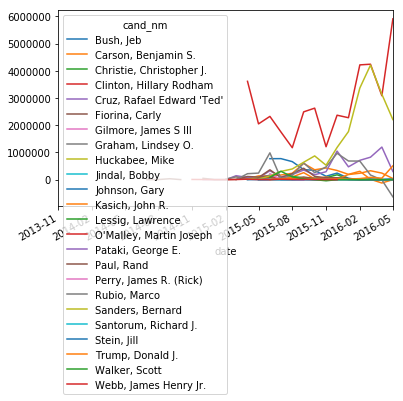

In [53]:
mon_contrib_wide.plot()

### Great! 
The lines on this plot look a little more readable... but wow it's small. And we can't see past the legend! Let's chat a bit about figures and axes...

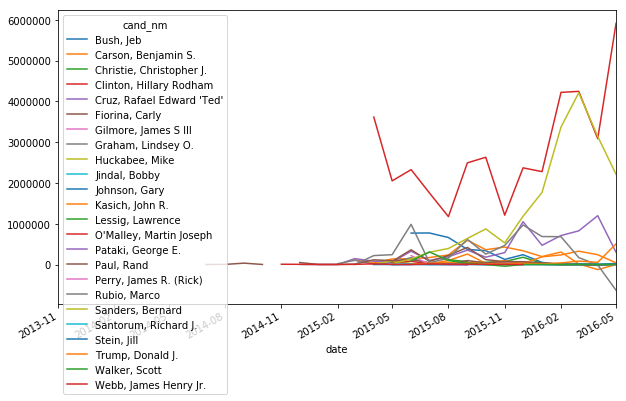

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide.plot(ax=ax)

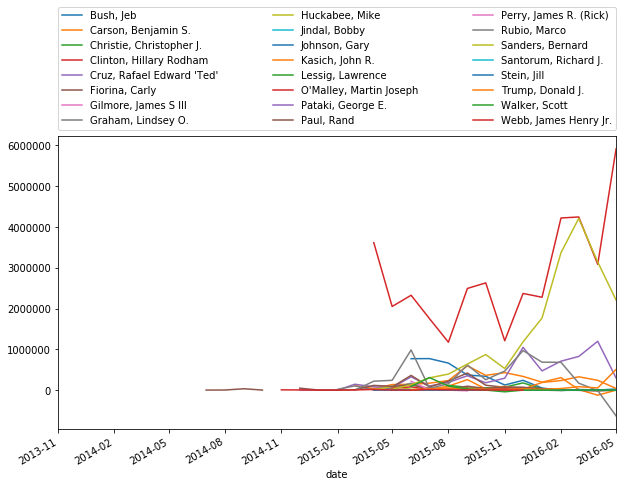

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide.plot(ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)

In [59]:
print(mon_contrib_wide.columns.values)

['Bush, Jeb' 'Carson, Benjamin S.' 'Christie, Christopher J.'
 'Clinton, Hillary Rodham' "Cruz, Rafael Edward 'Ted'" 'Fiorina, Carly'
 'Gilmore, James S III' 'Graham, Lindsey O.' 'Huckabee, Mike'
 'Jindal, Bobby' 'Johnson, Gary' 'Kasich, John R.' 'Lessig, Lawrence'
 "O'Malley, Martin Joseph" 'Pataki, George E.' 'Paul, Rand'
 'Perry, James R. (Rick)' 'Rubio, Marco' 'Sanders, Bernard'
 'Santorum, Richard J.' 'Stein, Jill' 'Trump, Donald J.' 'Walker, Scott'
 'Webb, James Henry Jr.']


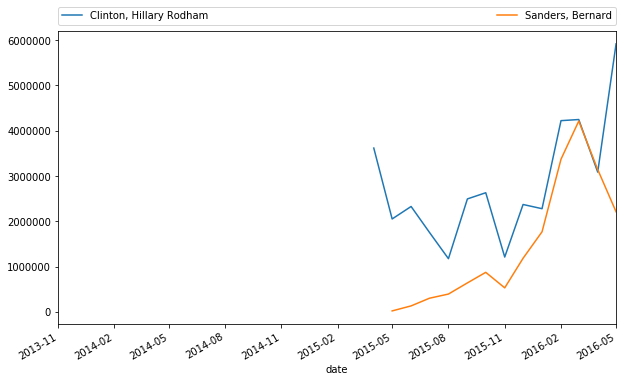

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide[['Clinton, Hillary Rodham', 'Sanders, Bernard']].plot(ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)

In [63]:
import matplotlib
matplotlib.style.use('ggplot')

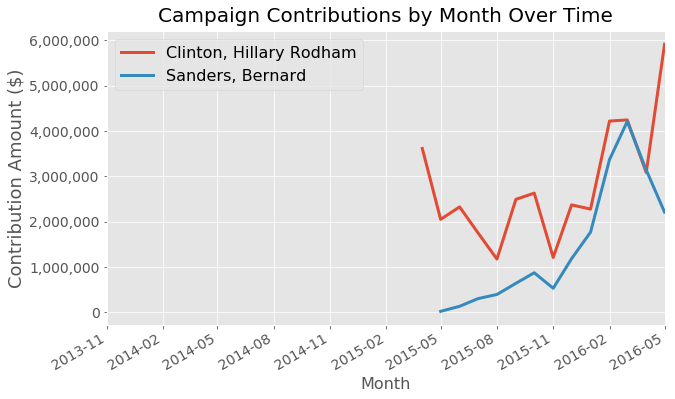

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide[['Clinton, Hillary Rodham', 'Sanders, Bernard']].plot(ax=ax, linewidth=3)

# Add some more Labeling
ax.legend(loc="upper left", fontsize=16)
plt.title("Campaign Contributions by Month Over Time",  y=1.01, size=20)
plt.xlabel("Month", size=16)
plt.ylabel("Contribution Amount ($)", size=18)

# Axis Sizes and format
plt.tick_params(labelsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

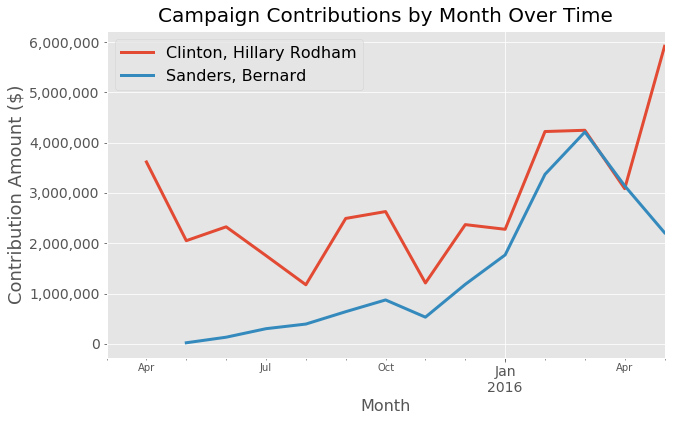

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide['2015-03':'2016-07'][['Clinton, Hillary Rodham', 'Sanders, Bernard']].plot(ax=ax, linewidth=3)

# Add some more Labeling
ax.legend(loc="upper left", fontsize=16)
plt.title("Campaign Contributions by Month Over Time",  y=1.01, size=20)
plt.xlabel("Month", size=16)
plt.ylabel("Contribution Amount ($)", size=18)

# Axis Sizes and format
plt.tick_params(labelsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Pause
What stories can you tell with this graph?

In [67]:
mon_contrib_wide.columns.values

array(['Bush, Jeb', 'Carson, Benjamin S.', 'Christie, Christopher J.',
       'Clinton, Hillary Rodham', "Cruz, Rafael Edward 'Ted'",
       'Fiorina, Carly', 'Gilmore, James S III', 'Graham, Lindsey O.',
       'Huckabee, Mike', 'Jindal, Bobby', 'Johnson, Gary',
       'Kasich, John R.', 'Lessig, Lawrence', "O'Malley, Martin Joseph",
       'Pataki, George E.', 'Paul, Rand', 'Perry, James R. (Rick)',
       'Rubio, Marco', 'Sanders, Bernard', 'Santorum, Richard J.',
       'Stein, Jill', 'Trump, Donald J.', 'Walker, Scott',
       'Webb, James Henry Jr.'], dtype=object)

In [68]:
republicans = ['Bush, Jeb', 'Carson, Benjamin S.',
       'Fiorina, Carly', 'Kasich, John R.',
       'Rubio, Marco', 'Trump, Donald J.']

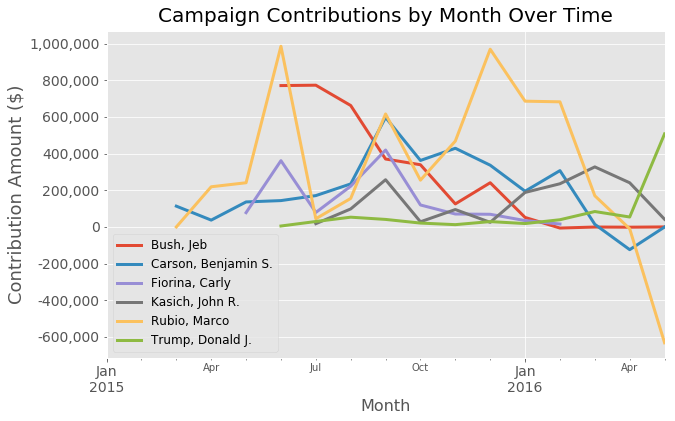

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide['2015-01':'2016-07'][republicans].plot(ax=ax, linewidth=3)

# Add some more Labeling
ax.legend(loc="lower left", fontsize=12)
plt.title("Campaign Contributions by Month Over Time",  y=1.01, size=20)
plt.xlabel("Month", size=16)
plt.ylabel("Contribution Amount ($)", size=18)

# Axis Sizes and format
plt.tick_params(labelsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Pause
What stories can you tell with this graph?

In [70]:
def format():
    # Add some more Labeling
    ax.legend(loc="lower left", fontsize=12)
    plt.title("Campaign Contributions by Month Over Time",  y=1.01, size=20)
    plt.xlabel("Month", size=16)
    plt.ylabel("Contribution Amount ($)", size=18)

    # Axis Sizes and format
    plt.tick_params(labelsize=14)
#    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

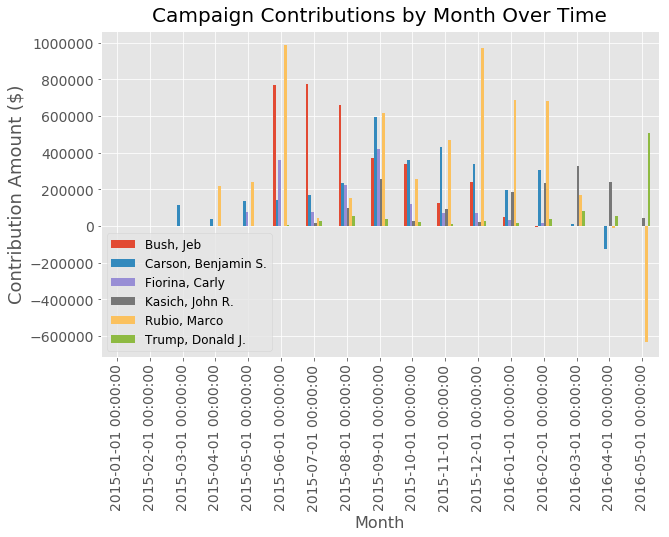

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide['2015-01':'2016-07'][republicans].plot.bar(ax=ax)

format()


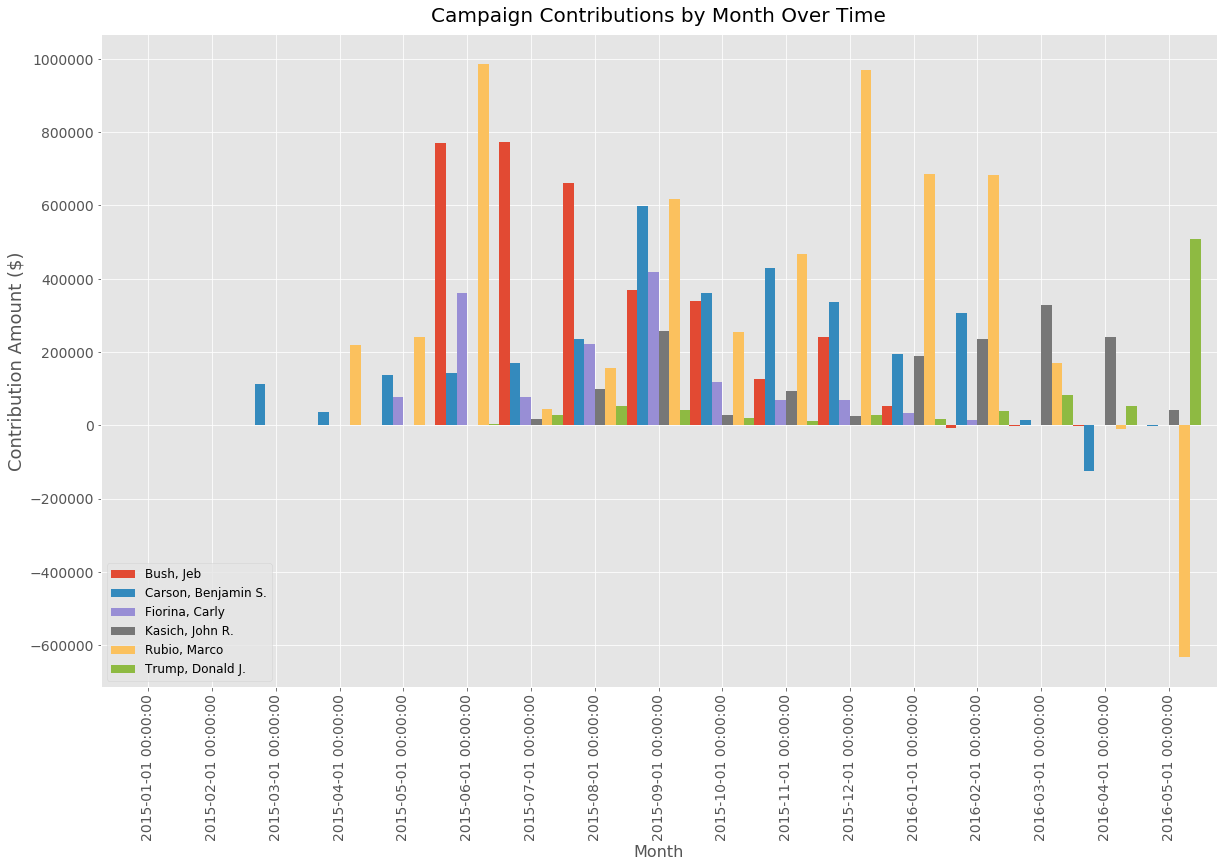

In [73]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = mon_contrib_wide['2015-01':'2016-07'][republicans].plot.bar(ax=ax, width=1)

format()

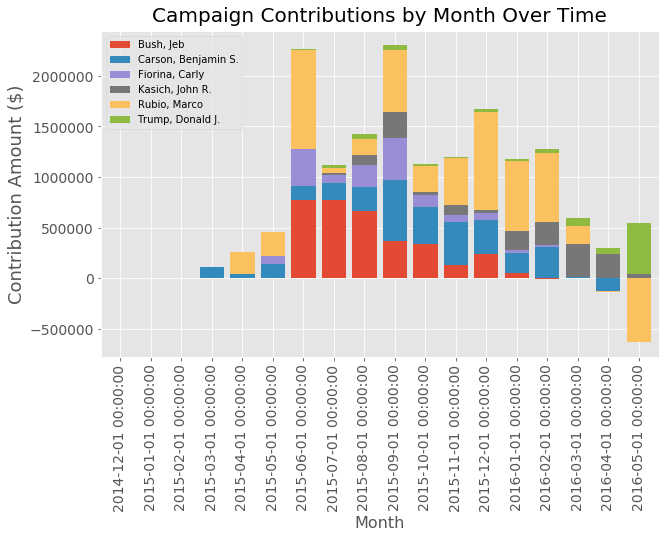

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = mon_contrib_wide['2014-12':'2016-07'][republicans].plot.bar(ax=ax, width=.8, stacked=True)
format()
ax.legend(loc='upper left')